# Vehicle Behavior Analysis

## Objective
To analyze motion patterns of tracked vehicles and identify abnormal or noteworthy behaviors such as slow-moving vehicles and sudden speed drops using trajectory-based features.


In [3]:
import os
os.getcwd()


'C:\\Users\\vpokh'

In [4]:
import pickle

with open("outputs/trajectory_data.pkl", "rb") as f:
    data = pickle.load(f)

track_history = data["track_history"]
vehicle_speeds = data["vehicle_speeds"]
fps = data["fps"]


In [6]:
all_speeds=list(vehicle_speeds.values())
mean_speed=np.mean(all_speeds)
std_speed=np.std(all_speeds)
slow_threshold =mean_speed - 0.8 * std_speed

In [7]:
slow_vehicles=[]
for vid,speed in vehicle_speeds.items():
    if speed<slow_threshold:
        slow_vehicles.append(vid)

In [8]:
slow_vehicles

[4, 7, 8, 13, 19, 20, 36, 55, 70, 77, 93, 99, 123]

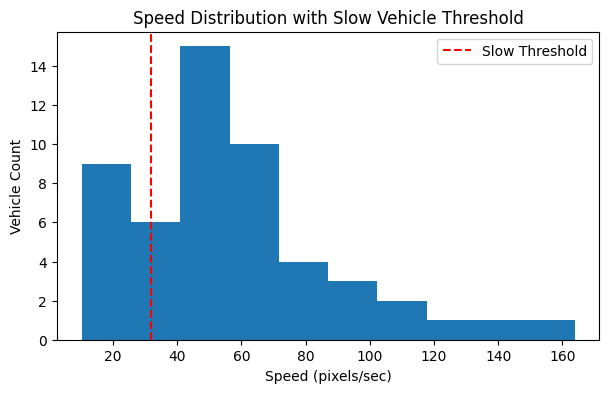

In [9]:
plt.figure(figsize=(7,4))
plt.hist(all_speeds, bins=10)
plt.axvline(slow_threshold, color='red', linestyle='--', label='Slow Threshold')
plt.xlabel("Speed (pixels/sec)")
plt.ylabel("Vehicle Count")
plt.title("Speed Distribution with Slow Vehicle Threshold")
plt.legend()
plt.show()


In [10]:
speed_time_series={}

for vid,points in track_history.items():
    speeds=[]
    for i in range(1,len(points)):
        x1, y1 = points[i-1]
        x2, y2 = points[i]
        dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        speeds.append(dist * fps)
    speed_time_series[vid] = speeds   

In [13]:
sudden_brake_vehicles = []

for vid, speeds in speed_time_series.items():
    for i in range(1, len(speeds)):
        if speeds[i] < 0.6 * speeds[i-1]:
            sudden_brake_vehicles.append(vid)
            break


## Observations

- Most vehicles exhibit stable speed profiles consistent with highway traffic.
- A subset of vehicles shows significantly lower speeds, indicating possible slow-moving or obstructive behavior.
- Sudden speed drops may correspond to braking events or emerging traffic congestion.
- Trajectory-based behavioral features provide meaningful insights beyond frame-level detection.
